In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("df.csv")
df

,Unnamed: 0,Card Number,Date,Amount,CBK
0,0,536518******2108,2015-05-01 00:01:54,36.54,No
1,1,536518******2108,2015-05-01 00:03:46,36.54,No
2,2,453211******1239,2015-05-01 00:08:50,69.00,No
3,3,548827******1705,2015-05-01 00:27:00,193.43,No
4,4,531681******9778,2015-05-01 01:32:46,132.00,No
...,...,...,...,...,...
11122,11123,514868******7409,2015-05-30 23:07:01,53.00,No
11123,11124,439354******5281,2015-05-30 23:08:47,15.00,No
11124,11125,549167******1648,2015-05-30 23:15:24,20.00,No
11125,11126,518759******8384,2015-05-30 23:17:41,70.00,No


In [72]:
df.head()

,Unnamed: 0,Card Number,Date,Amount,CBK
0,0,536518******2108,2015-05-01 00:01:54,36.54,No
1,1,536518******2108,2015-05-01 00:03:46,36.54,No
2,2,453211******1239,2015-05-01 00:08:50,69.00,No
3,3,548827******1705,2015-05-01 00:27:00,193.43,No
4,4,531681******9778,2015-05-01 01:32:46,132.00,No


In [73]:
def normalize(df):
    return (df - df.mean()) / df.std()

In [74]:
df = df[['Card Number', 'Date', 'Amount', 'CBK']]
df = df.sample(frac = 1) 
df

card_numbers_to_idx = { v:k for k,v in enumerate(np.unique(df['Card Number'].values))}
df['Card Number'].replace(card_numbers_to_idx, inplace=True)
df['Card Number'] = normalize(df['Card Number'])

df['Date'] = df['Date'].values.astype("datetime64[s]")
df['Date'] = normalize(df['Date'])

#df['Amount'] = normalize(df['Amount'])

df.replace({'No': 0, 'Yes': 1}, inplace=True)
df

,Card Number,Date,Amount,CBK
2062,0.196694,-1.047180,121.0,0
2494,0.909983,-0.946049,69.0,0
1588,-0.730134,-1.123143,99.0,0
5514,-0.794606,-0.167234,198.0,0
5707,-1.568640,-0.136241,470.0,0
...,...,...,...,...
4094,1.097063,-0.502605,77.0,0
4086,1.493583,-0.503192,352.0,0
1693,0.227999,-1.111000,121.0,0
2764,-0.308645,-0.837664,143.0,0


In [75]:
df.describe()

,Card Number,Date,Amount,CBK
count,1.112700e+04,1.112700e+04,11127.000000,11127.000000
mean,1.143050e-16,2.145677e-13,129.559922,0.051406
std,1.000000e+00,1.000000e+00,141.423095,0.220835
min,-1.725161e+00,-1.894450e+00,1.000000,0.000000
25%,-8.641086e-01,-8.359174e-01,55.000000,0.000000
50%,-4.477255e-04,-1.557283e-01,99.000000,0.000000
75%,8.647039e-01,8.564723e-01,154.000000,0.000000
max,1.725383e+00,1.712685e+00,2920.000000,1.000000


In [76]:
fraud = df[df['CBK'] == 1] 
valid = df[df['CBK'] == 0] 
ratio = len(fraud)/float(len(valid)) 
print(ratio)
print(len(fraud))
print(len(valid))

0.0541923259118901
572
10555


In [77]:
print(fraud['Amount'].describe())
print('-------------------')
print(valid['Amount'].describe())

count     572.000000
mean      183.300455
std       165.331552
min        13.990000
25%        69.000000
50%       132.000000
75%       209.250000
max      1012.000000
Name: Amount, dtype: float64
-------------------
count    10555.000000
mean       126.647597
std        139.429512
min          1.000000
25%         55.000000
50%         99.000000
75%        154.000000
max       2920.000000
Name: Amount, dtype: float64


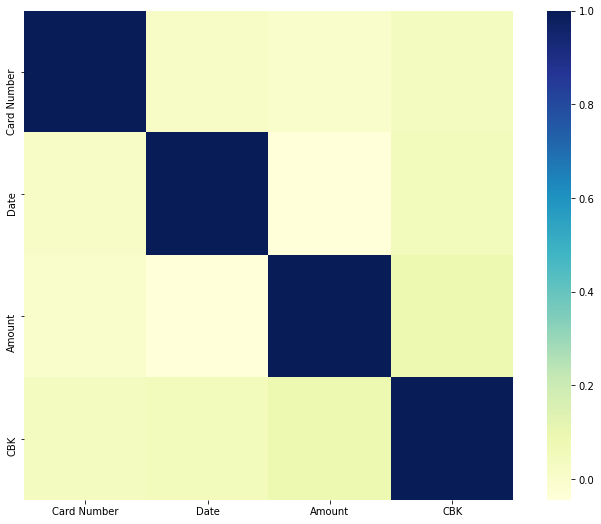

In [78]:
correlation = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(correlation, vmax = 1, square = True, cmap="YlGnBu") 
plt.show()

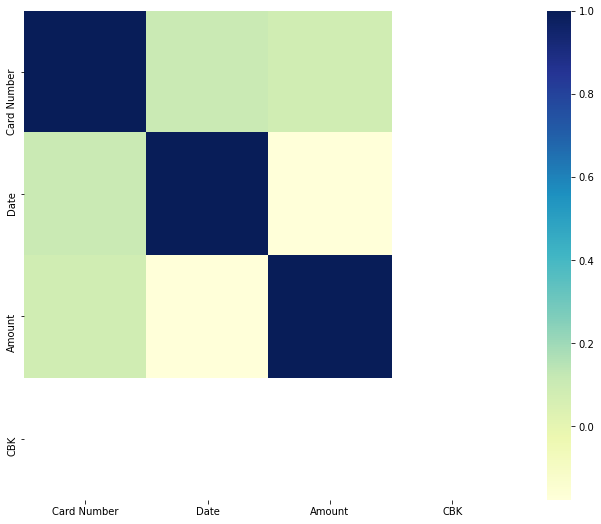

In [79]:
correlation = fraud.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(correlation, vmax = 1, square = True, cmap="YlGnBu") 
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X=df[['Card Number', 'Date', 'Amount']]  # Features
y=df['CBK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200)
model = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy Score :', accuracy_score(y_test,y_pred))
print('Confusion Matrix :', confusion_matrix(y_test,y_pred))
print('Classification Report :', classification_report(y_test,y_pred))

Accuracy Score : 0.9789473684210527
Confusion Matrix : [[3674   10]
 [  72  139]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3684
           1       0.93      0.66      0.77       211

    accuracy                           0.98      3895
   macro avg       0.96      0.83      0.88      3895
weighted avg       0.98      0.98      0.98      3895



In [82]:
import joblib
import os
if not os.path.exists('Model'):
    os.mkdir('Model')   
joblib.dump(model, r'Model/model.pickle')

['Model/model.pickle']

In [83]:
model = joblib.load(r'Model/model.pickle')
test_data = pd.read_csv("test.csv")
test_data = test_data[['Card Number','Date','Amount']]
test_data

,Card Number,Date,Amount
0,554906******0358,5/1/2015 9:16,126.5
1,498406******6424,5/1/2015 9:21,126.5


In [85]:
test_data

card_numbers_to_idx = {v:k for k,v in enumerate(np.unique(test_data['Card Number'].values))}
test_data['Card Number'].replace(card_numbers_to_idx, inplace=True)
test_data['Card Number'] = normalize(test_data['Card Number'])

test_data['Date'] = test_data['Date'].values.astype("datetime64[s]")
test_data['Date'] = normalize(test_data['Date'])

#test_data['Amount'] = normalize(test_data['Amount'])

test_data

ValueError: Error parsing datetime string "5/1/2015 9:16" at position 1